# 1- Importing the important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# 2- Setting some initial setting to display the data in its full length and avoid unnecessary warnings.

In [2]:
pd.set_option('display.max_columns', None) # To display all columns
pd.set_option('display.max_rows', None) # To display all rows
wr.filterwarnings('ignore') # To ignore warnings


# 3- Reading the csv files using the pandas library

In [3]:
df =pd.read_csv('machine_downtime.csv')
# Read the data from csv file  and store it in df variable

# 4-  Exploring the data.

In [4]:
df.head()
# Displaying first 5 rows

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [5]:
df.tail()
# Displaying last 5 rows

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [6]:
# Checkingthe number of rows and columns
df.shape
print ("Number of rows and columns are repsectively: ", df.shape)

Number of rows and columns are repsectively:  (2500, 16)


In [7]:
# Only Checkingt he number of rows in the dataset
len(df)
print("Number of rows in the dataset are: ", len(df))

Number of rows in the dataset are:  2500


In [8]:
# To check the number of columns in the dataset
df.shape[1]
print (f"This dataset has {df.shape[1]} columns")

This dataset has 16 columns


In [9]:
# Checking the total number of elements in the dataset including NaN values. It is equal to the product of number of rows and columns
df.size

40000

In [10]:
# Checking the summary of the dataset. it include rows, columns, indexing range,  datatypes, not-null values count, memory usage etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [44]:
# Checking the Null Values in the dataset
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [47]:
# Percentage of missing values in the dataset
df.isnull().sum() / len(df) * 100

Date                               0.00
Machine_ID                         0.00
Assembly_Line_No                   0.00
Hydraulic_Pressure(bar)            0.40
Coolant_Pressure(bar)              0.76
Air_System_Pressure(bar)           0.68
Coolant_Temperature                0.48
Hydraulic_Oil_Temperature(°C)      0.64
Spindle_Bearing_Temperature(°C)    0.28
Spindle_Vibration(µm)              0.44
Tool_Vibration(µm)                 0.44
Spindle_Speed(RPM)                 0.24
Voltage(volts)                     0.24
Torque(Nm)                         0.84
Cutting(kN)                        0.28
Downtime                           0.00
dtype: float64

In [54]:
# Checking the DUPLICATES in the dataset as a whole.
df.duplicated().sum()

# There is no duplicate rows in the dataset

0

In [55]:
df.describe()

,Date,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2500,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,2022-03-13 05:57:41.760000,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
min,2021-11-24 00:00:00,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,2022-02-22 00:00:00,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,2022-03-14 00:00:00,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,2022-04-02 00:00:00,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,2022-07-03 00:00:00,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000
std,NaN,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688


In [57]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2500,2022-03-13 05:57:41.760000,2021-11-24 00:00:00,2022-02-22 00:00:00,2022-03-14 00:00:00,2022-04-02 00:00:00,2022-07-03 00:00:00,NaN
Hydraulic_Pressure(bar),2490.0,101.409084,-14.326454,76.355,96.763486,126.415727,191.0,30.289301
Coolant_Pressure(bar),2481.0,4.947058,0.325,4.462464,4.93996,5.518401,11.35,0.997357
Air_System_Pressure(bar),2483.0,6.499275,5.06348,6.217987,6.505191,6.78055,7.973992,0.407279
Coolant_Temperature,2488.0,18.559887,4.1,10.4,21.2,25.6,98.2,8.55448
Hydraulic_Oil_Temperature(°C),2484.0,47.618317,35.2,45.1,47.7,50.1,61.4,3.768674
Spindle_Bearing_Temperature(°C),2493.0,35.063698,22.6,32.5,35.1,37.6,49.5,3.764823
Spindle_Vibration(µm),2489.0,1.009334,-0.461,0.777,1.008,1.236,2.0,0.342898
Tool_Vibration(µm),2489.0,25.411975,2.161,21.089,25.455,29.79,45.726,6.437142
Spindle_Speed(RPM),2494.0,20274.792302,0.0,17919.0,20137.5,22501.75,27957.0,3852.660056


### Observation 1:
    - The column name DATE need to be checked and change the data type to `datetime`

In [11]:
# changing the datatype of the column 'Date' from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Date'].dtype

dtype('<M8[ns]')

In [13]:
df['Date'].head(2)

0   2021-12-31
1   2021-12-31
Name: Date, dtype: datetime64[ns]

In [14]:
df['Date'].nunique()

164

In [15]:
df['Date'].isnull().sum()
# Chehcikng the number of null values in the column 'Date'

0

In [16]:
df['Date'].value_counts()
# Checking the value counts of each date in the column 'Date'

Date
2022-03-15    64
2022-03-22    48
2022-03-19    48
2022-03-23    40
2022-04-02    40
2022-03-13    39
2022-03-08    37
2022-03-11    37
2022-03-01    37
2022-04-05    37
2022-03-14    36
2022-03-10    36
2022-03-25    35
2022-03-28    34
2022-03-02    34
2022-03-12    34
2022-03-17    33
2022-03-06    32
2022-03-04    32
2022-02-22    32
2022-03-05    31
2022-02-24    31
2022-03-20    30
2022-03-27    30
2022-04-04    30
2022-03-03    30
2022-03-31    30
2022-04-07    29
2022-03-29    29
2022-03-21    29
2022-03-30    29
2022-04-06    28
2022-02-28    28
2022-02-23    28
2022-03-09    28
2022-03-24    27
2022-02-21    27
2022-02-17    27
2022-02-27    27
2022-02-14    26
2022-03-18    26
2022-03-07    26
2022-02-18    25
2022-02-20    25
2022-02-25    25
2022-03-16    24
2022-04-13    24
2022-03-26    23
2022-02-11    22
2022-04-10    22
2022-04-16    22
2022-04-03    22
2022-02-15    21
2022-02-10    21
2022-02-06    21
2022-04-01    20
2022-02-12    20
2022-04-11    20
2022-02-1

In [17]:
df['Date'].value_counts().sum()
# Checking the total number of values in the column 'Date' 

2500

In [18]:
df['Date'].dt.year.value_counts()
# Checking the value counts of each year in the column 'Date' by year

Date
2022    2475
2021      25
Name: count, dtype: int64

In [19]:
df['Date'].dt.year.value_counts().sum()
# Checking the total number of values in the column 'Date'

2500

In [20]:
df['Date'].dt.month.value_counts()
# Checking the value counts of each month in the column 'Date' by Month

Date
3     1048
2      597
4      527
1      178
5      116
12      24
6        8
11       1
7        1
Name: count, dtype: int64

In [21]:
df['Date'].dt.month.value_counts().sum()   
# Checking the total number of values in the column 'Date' by Month

2500

In [22]:
df['Date'].dt.day.value_counts()
# Checking the value counts of each day in the column 'Date'

Date
15    107
22    106
6      95
19     94
10     90
13     90
14     89
5      89
4      88
28     87
2      87
7      86
25     86
11     86
1      86
23     83
12     83
24     82
17     82
27     81
21     79
3      74
16     74
18     73
20     73
8      72
9      68
30     60
26     57
29     49
31     44
Name: count, dtype: int64

In [23]:
df['Date'].dt.day.value_counts().sum()
# Checking the total number of values in the column 'Date'by day

2500

In [24]:
df['Date'].dt.to_period('M').value_counts().sort_values(ascending=False)

# Extracting/ Grouping the year along with month from the column 'Date' and storing it 


Date
2022-03    1048
2022-02     597
2022-04     527
2022-01     178
2022-05     116
2021-12      24
2022-06       8
2021-11       1
2022-07       1
Freq: M, Name: count, dtype: int64

### Finding in `Date` column:
- There is `no null value` for date `column`
- A totall of `2500` rows in the column. Checked by date, month and year individualy.
- A totall of `2500` rows in the column. Check
- The Highest entries is for the year `2022` i.e `2475`
- The lowest entries is for the month was for the month of `March` in the year of `2022`
- The lowest entries is for the month was for the month of `July` in the year of `2022`
- For years `2021` there was two working months i.e `november` and `december`

### Changes In `Date` column:
- The datatype is changes in `Date` column from `object` to `datetime`.

In [25]:
# Chehcking the unique values in each column
df.nunique().sort_values(ascending=False)

Air_System_Pressure(bar)           2472
Tool_Vibration(µm)                 2350
Hydraulic_Pressure(bar)            1977
Coolant_Pressure(bar)              1628
Torque(Nm)                         1327
Spindle_Speed(RPM)                 1180
Spindle_Vibration(µm)              1144
Coolant_Temperature                 275
Voltage(volts)                      238
Hydraulic_Oil_Temperature(°C)       209
Spindle_Bearing_Temperature(°C)     204
Cutting(kN)                         170
Date                                164
Machine_ID                            3
Assembly_Line_No                      3
Downtime                              2
dtype: int64

### Observation : 2
- It seem that there are `3` different machines as column names `Machine_ID` showing `3` valuses.
- Also there seems to have `3` differrent assembly line as `Assembly_Line_No` showing `3` values.
- `Air_System_Pressure(bar)` coulms and `Tool_Vibration(µm)` have most unique values `2472` and `2350` respectively, that show they are most values which are variable .
- `Downtime` column seems like a `boolean` column have just two dtype of values

### Exploring the data from the column `Machine_ID`

In [26]:
df['Machine_ID'].value_counts()
# Checking the count of each unique value in the column

Machine_ID
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    808
Name: count, dtype: int64

In [27]:
df['Machine_ID'].value_counts().sum()
# Sum of all the unique values in the column

2500

In [28]:
df['Machine_ID'].isnull().sum()
# Checking the number of null values in the column

0

In [29]:
df['Machine_ID'].dtypes

dtype('O')

### Finding from the column `Machine_ID`
- column name 'Machine_ID' has three unique values:
  - Makino-L1-Unit1-2013    874
  - Makino-L3-Unit1-2015    818
  - Makino-L2-Unit1-2015    808
- A total of 2500 rows of data.
- No `NaN` values are present in the column.
- The data type is `object`.
- No need to search for `duplicate` values in the column table as the number of `unique` values is equal to the `rows` in the dataset

### Exploring the data from the column `Assembly_Line_No`

In [30]:
df['Assembly_Line_No'].value_counts()

Assembly_Line_No
Shopfloor-L1    874
Shopfloor-L3    818
Shopfloor-L2    808
Name: count, dtype: int64

In [31]:
df['Assembly_Line_No'].value_counts().sum()

2500

In [32]:
df['Assembly_Line_No'].isnull().sum()

0

In [33]:
df['Assembly_Line_No'].dtype

dtype('O')

### Findings from the column `Assembly_Line_No`
- The column has three valuses:
  - Shopfloor-L1    874
  - Shopfloor-L3    818
  - Shopfloor-L2    808
- A total of `2500` rows in the column table.
- There is no `NaN` values in the column table
- The dat type is `object`
- No need to search for `duplicate` values in the column table as the number of `unique` values is equal to the `rows` in the dataset

# ### Exploring the data from the column `Downtime`

In [34]:
df['Downtime']

0          Machine_Failure
1          Machine_Failure
2          Machine_Failure
3          Machine_Failure
4          Machine_Failure
5          Machine_Failure
6          Machine_Failure
7       No_Machine_Failure
8       No_Machine_Failure
9          Machine_Failure
10         Machine_Failure
11         Machine_Failure
12         Machine_Failure
13         Machine_Failure
14         Machine_Failure
15         Machine_Failure
16         Machine_Failure
17         Machine_Failure
18         Machine_Failure
19         Machine_Failure
20         Machine_Failure
21      No_Machine_Failure
22         Machine_Failure
23      No_Machine_Failure
24      No_Machine_Failure
25      No_Machine_Failure
26         Machine_Failure
27      No_Machine_Failure
28         Machine_Failure
29      No_Machine_Failure
30      No_Machine_Failure
31      No_Machine_Failure
32      No_Machine_Failure
33         Machine_Failure
34         Machine_Failure
35         Machine_Failure
36      No_Machine_Failure
3

In [35]:
df['Downtime'].nunique()

2

In [36]:
df['Downtime'].value_counts()

Downtime
Machine_Failure       1265
No_Machine_Failure    1235
Name: count, dtype: int64

In [37]:
df['Downtime'].value_counts().sum()

2500

In [38]:
df['Downtime'].dtype

dtype('O')

In [39]:
df['Downtime'] = df['Downtime'].map({'No_Machine_Failure': False, 'Machine_Failure': True})

In [40]:
df['Downtime'] = df['Downtime'].astype('bool')

In [41]:
df['Downtime'].value_counts()

Downtime
True     1265
False    1235
Name: count, dtype: int64

### Changes in the column `Downtime`:
- The column `Downtime` has two values . So i decided to change it into boolean datatypes
- Entry `Machine_Failure`  is changed into an entry `True`.
- Entry `No_Machine_Failure` is changed into an entry `False`
- So, in column `Downtime` the `True = Machine_Failure`    and  `False = No_Machine_Failure`

In [42]:
df.head(2)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,True
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,True


In [11]:
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [27]:
# pERCWNTABGE OF NULL VALUES IN EACH COLUMN
df.isnull().sum()/len(df)*100

Date                               0.00
Machine_ID                         0.00
Assembly_Line_No                   0.00
Hydraulic_Pressure(bar)            0.40
Coolant_Pressure(bar)              0.76
Air_System_Pressure(bar)           0.68
Coolant_Temperature                0.48
Hydraulic_Oil_Temperature(°C)      0.64
Spindle_Bearing_Temperature(°C)    0.28
Spindle_Vibration(µm)              0.44
Tool_Vibration(µm)                 0.44
Spindle_Speed(RPM)                 0.24
Voltage(volts)                     0.24
Torque(Nm)                         0.84
Cutting(kN)                        0.28
Downtime                           0.00
dtype: float64

In [39]:
df['Hydraulic_Pressure(bar)'].dtype

dtype('float64')

In [38]:
df['Hydraulic_Pressure(bar)'].value_counts()

Hydraulic_Pressure(bar)
90.458747    20
88.279134    20
89.458747    20
82.968808    19
81.138221    19
             ..
69.760000     1
54.290000     1
91.650000     1
66.190000     1
96.690000     1
Name: count, Length: 1977, dtype: int64

In [35]:
df['Hydraulic_Pressure(bar)'].value_counts().sum()

2490

In [41]:
df['Hydraulic_Pressure(bar)'].isnull().sum()

10

In [59]:
df['Hydraulic_Pressure(bar)'][df['Hydraulic_Pressure(bar)'].isnull()]


464    NaN
884    NaN
1186   NaN
1299   NaN
1569   NaN
1886   NaN
2067   NaN
2313   NaN
2446   NaN
2461   NaN
Name: Hydraulic_Pressure(bar), dtype: float64

In [60]:
df['Hydraulic_Pressure(bar)'].describe()

count    2490.000000
mean      101.409084
std        30.289301
min       -14.326454
25%        76.355000
50%        96.763486
75%       126.415727
max       191.000000
Name: Hydraulic_Pressure(bar), dtype: float64

In [ ]:
df['Hydraulic_Pressure(bar)'].remo

In [71]:
# remove the null values from the column Hydraulic_Pressure(bar)
df['Hydraulic_Pressure(bar)'].dropna(inplace=True)

In [78]:

# Log Transformation
df['log_data'] = np.log(df['Hydraulic_Pressure(bar)'])

In [88]:
# Create a co relation matrix and plot it exluding the log_data column
corr = df.drop('log_data', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);



ValueError: could not convert string to float: '31-12-2021'

In [85]:
df.select_dtypes(include=[np.number])

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),log_data,boxcox_data
0,86.566454,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,4.460912,86.666454
1,140.856454,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,4.947741,140.956454
2,86.646454,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,4.461836,86.746454
3,154.866454,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,5.042563,154.966454
4,76.036454,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,4.331213,76.136454
5,152.896454,5.918357,7.228066,5.4,48.0,32.7,0.903,25.597,27613.0,319.0,25.521330,3.55,5.029761,152.996454
6,151.456454,6.560332,6.710999,19.3,48.8,37.4,1.240,32.138,26605.0,438.0,25.454652,3.58,5.020298,151.556454
7,143.241618,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,4.964533,143.341618
8,139.144910,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,4.935516,139.244910
9,149.546454,5.567857,6.733096,14.0,47.9,35.2,0.748,36.601,20504.0,379.0,25.618567,3.93,5.007607,149.646454


In [83]:



# Box-Cox Transformation
df['boxcox_data'] = df['Hydraulic_Pressure(bar)'] + 0.1
df['boxcox_data'], _ = stats.boxcox(df['boxcox_data'])



BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

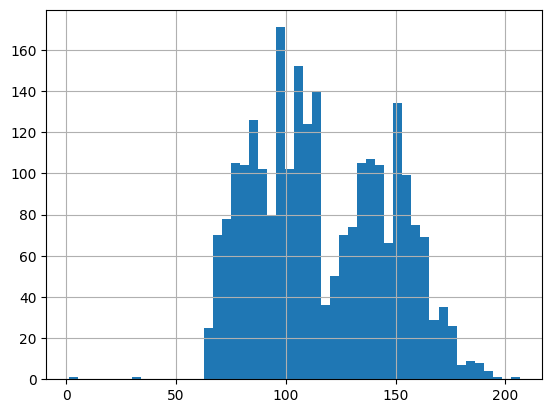

In [76]:
# create a histogram plot of the Hydraulic_Pressure(bar) column
df['Hydraulic_Pressure(bar)'].hist(bins=50)
plt.show()


In [70]:
from scipy import stats

# add a small positive constant to ensure all values are positive
df['Hydraulic_Pressure(bar)'] = df['Hydraulic_Pressure(bar)'] + 0.1

df['Hydraulic_Pressure(bar)'], _ = stats.boxcox(df['Hydraulic_Pressure(bar)'])


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [64]:
# create a scatter plot of the Hydraulic_Pressure(bar) column vs Coolant_Pressure(bar) column
plt.scatter(df['Hydraulic_Pressure(bar)'])
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [62]:
np.log(df['Hydraulic_Pressure(bar)'])

0       4.263243
1       4.830950
2       4.264369
3       4.936917
4       4.102809
5       4.922678
6       4.912140
7       4.849802
8       4.817200
9       4.897989
10      4.272630
11      4.901862
12      4.016923
13      4.122770
14      4.385396
15      4.958359
16      4.155126
17      4.949752
18      4.539564
19      4.315620
20      4.386268
21      4.939291
22      4.516339
23      5.001679
24      4.875565
25      4.978794
26      4.592085
27      5.136325
28      4.132603
29      4.716266
30      4.848657
31      4.712104
32      4.827624
33      4.835885
34      4.281930
35      4.360931
36      4.859019
37      4.574299
38      4.983470
39      3.934958
40      4.792527
41      4.452252
42      4.070735
43      4.847798
44      4.640307
45      4.048301
46      4.681492
47      4.754232
48      4.801006
49      4.899437
50      4.911271
51      4.664643
52      4.900150
53      4.932962
54      4.516776
55      4.324530
56      4.072440
57      4.600760
58      5.0034

In [56]:
df[['Hydraulic_Pressure(bar)','Air_System_Pressure(bar)']].value_counts()


Hydraulic_Pressure(bar)  Air_System_Pressure(bar)
 128.813087              6.430073                    2
 170.824762              5.955235                    2
 99.005207               6.940606                    2
 139.434025              5.928643                    2
 121.674817              6.753560                    2
 118.863928              6.062091                    1
 118.884635              6.148268                    1
 118.903700              6.532985                    1
 118.905773              7.314004                    1
 118.919203              6.124388                    1
 119.033246              5.976306                    1
 119.154911              6.571366                    1
-14.326454               6.163999                    1
 119.177949              6.410699                    1
 119.246989              7.050103                    1
 119.252567              6.062539                    1
 119.262234              6.502774                    1
 119.262870    

In [58]:
# Checking the index number 500 on the column nanme 'Hydraulic_Pressure(bar)
df['Hydraulic_Pressure(bar)'][500]

142.36

In [57]:
df['Hydraulic_Oil_Temperature(°C)'[0]]

KeyError: 'H'

In [46]:
df['Hydraulic_Pressure(bar)'].isnull().sort_values(ascending=False)

2067     True
1569     True
1299     True
2461     True
464      True
2313     True
1186     True
884      True
1886     True
2446     True
0       False
1668    False
1665    False
1666    False
1667    False
1670    False
1669    False
1663    False
1671    False
1672    False
1673    False
1674    False
1675    False
1664    False
1661    False
1662    False
1652    False
1645    False
1646    False
1647    False
1648    False
1649    False
1650    False
1651    False
1653    False
1677    False
1654    False
1655    False
1656    False
1657    False
1658    False
1659    False
1660    False
1676    False
1680    False
1678    False
1706    False
1699    False
1700    False
1701    False
1702    False
1703    False
1704    False
1705    False
1707    False
1679    False
1708    False
1709    False
1710    False
1711    False
1712    False
1713    False
1714    False
1698    False
1697    False
1696    False
1695    False
1643    False
1681    False
1682    False
1683    False
1684  